In [1]:
#Importing Libraries
import cv2

import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

(512, 512, 3)


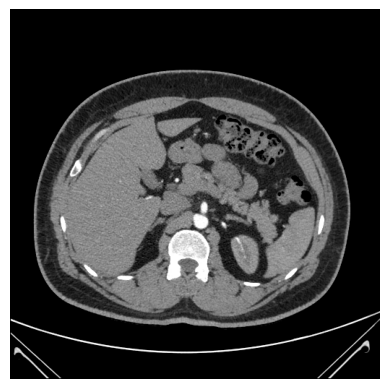

In [2]:
#Plotting Image
orig_img=cv2.imread(r"C:\Users\essam\Kidney condition\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Normal\Normal- (1).jpg",1)
print(orig_img.shape)
# 1 indicates color image
# OpenCV uses BGR while Matplotlib uses RGB format
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

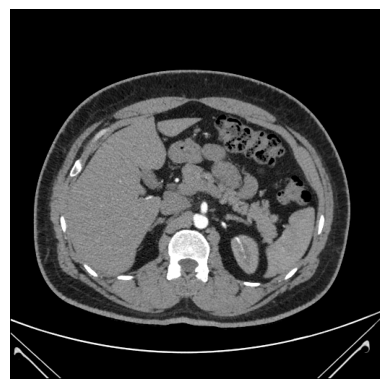

In [3]:
#Converting the Image into Greyscale
gray_img = cv2.cvtColor( orig_img, cv2.COLOR_BGR2GRAY ) 
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

Threshold limit: 73.0


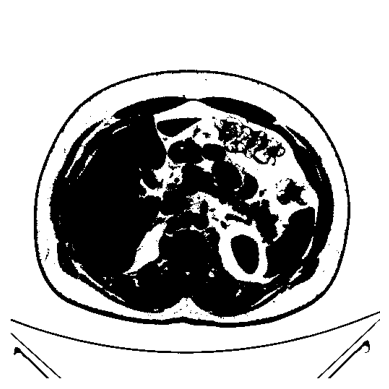

In [4]:
#Performing Otsu's Binarization
ret, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

In [5]:
#Specifying the Background and Foreground after Noise Removal
# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [6]:
#Performing Distance Transfrom
# plt.imshow(dist_transform, cmap = 'gray')

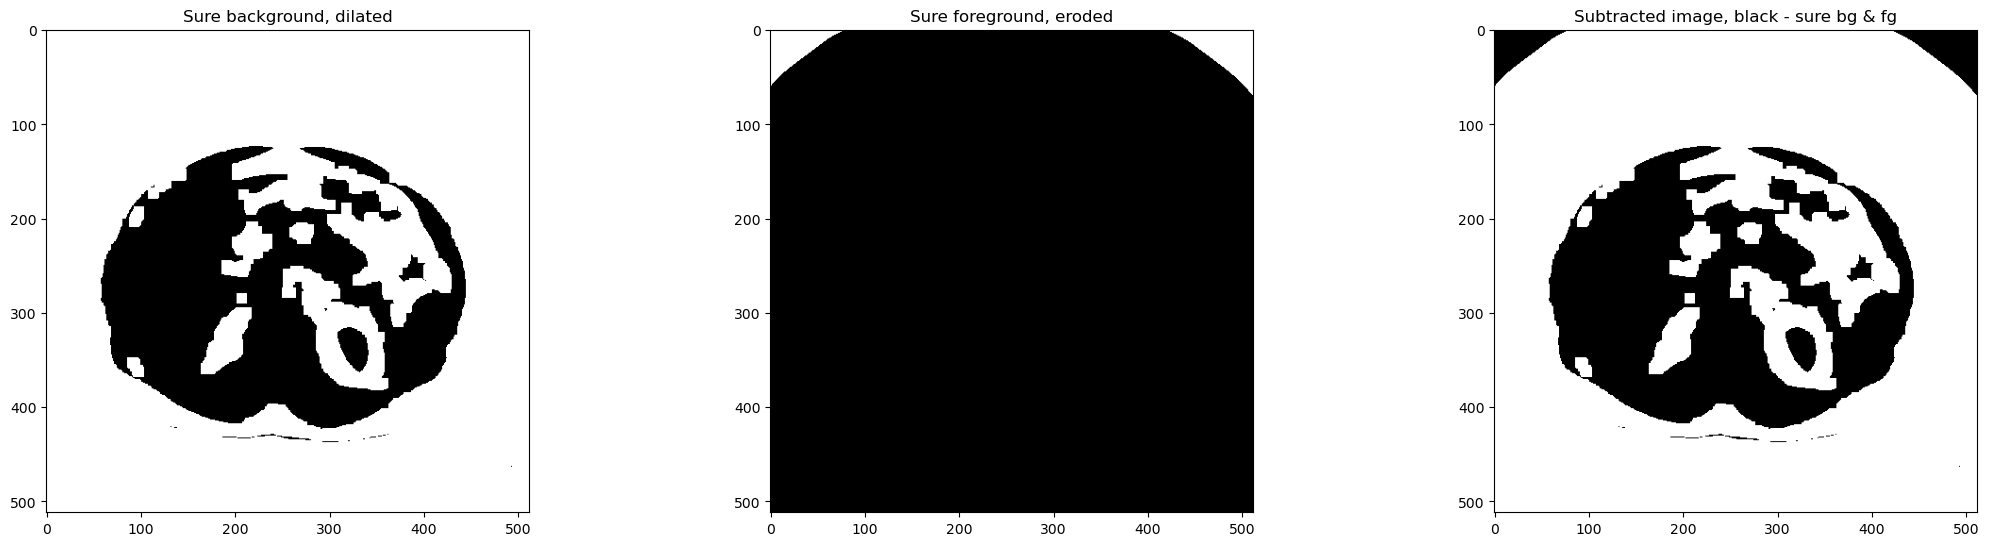

In [7]:
#Plotting the Foreground, Background and the Subtracted Image
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.imshow(unknown, cmap = 'gray')
plt.title('Subtracted image, black - sure bg & fg')
plt.tight_layout()

plt.subplots_adjust(wspace = 0.5)
# fine tuning 

In [8]:
#Displaying the connected components sure_bg and sure_fg
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown==255] = 0

fig = plt.figure(figsize = (20, 10)) # to change figsize
# plt.subplot(121)
# plt.imshow(markers, cmap = 'gray')
# plt.subplot(122)
# plt.imshow(markers)

<Figure size 2000x1000 with 0 Axes>

In [9]:
#Applying Watershed Segmentation
markers = cv2.watershed(orig_img, markers)
orig_img[markers == -1] = [0, 255,0]

In [10]:
orig_img.shape

(512, 512, 3)

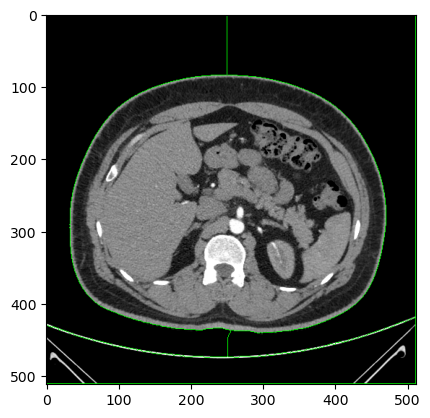

In [11]:
plt.imshow(orig_img)